In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = pd.read_csv('bank.csv', delimiter=';')
data1 = np.genfromtxt("bank.csv", delimiter=";").transpose()

reg = LogisticRegression()

In [3]:
x1 = np.array([data['age'].tolist()]).reshape(-1,1)
x1

array([[30],
       [33],
       [35],
       ...,
       [57],
       [28],
       [44]])

In [4]:
y1 = np.array(data['marital'] == 'married').astype(int)
y1

array([1, 1, 0, ..., 1, 1, 0])

In [5]:
reg.fit(x1,y1)
x2 = np.linspace(0,5000,1000).reshape(-1,1)
y2 = reg.predict_proba(x2)
y2

array([[0.87870493, 0.12129507],
       [0.8420886 , 0.1579114 ],
       [0.79697259, 0.20302741],
       ...,
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

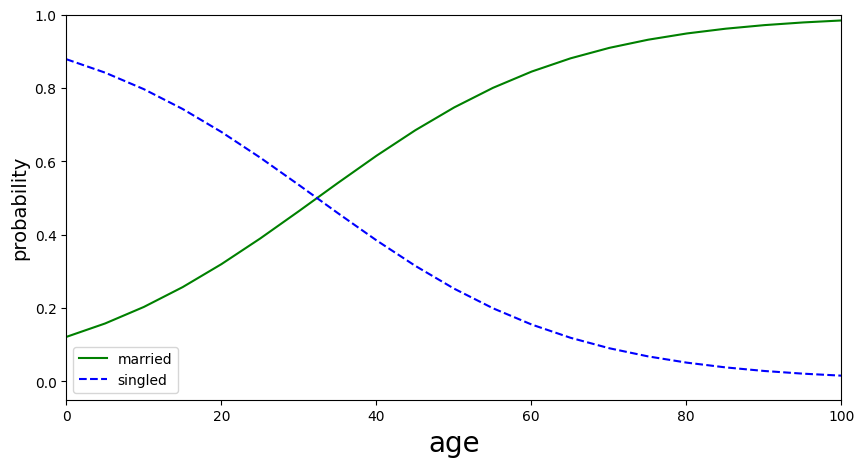

In [6]:
plt.figure(figsize=(10,5))
plt.plot(x2,y2[:,1],'g-',label = 'married')
plt.plot(x2,y2[:,0],'b--',label = 'singled')
plt.xlabel('age',fontsize = 20)
plt.ylabel('probability',fontsize = 14)
plt.axis([0,100,-0.05,1])
plt.legend()

In [7]:
#x2 = np.array([data['age'].tolist()]).reshape(-1,1)
t1 = np.array([data['age'].tolist()]).reshape(-1,1)
t2 = np.array([data['balance'].tolist()]).reshape(-1,1)
y2 = np.array(data['marital'] == 'married').astype(int)

n = t1.shape[0]
x2 = np.ones((n, 2))
x2[:, 0] = t1.flatten()
x2[:, 1] = t2.flatten()
x2

array([[  30., 1787.],
       [  33., 4789.],
       [  35., 1350.],
       ...,
       [  57.,  295.],
       [  28., 1137.],
       [  44., 1136.]])

In [8]:
reg1 = LogisticRegression()
reg1.fit(x2,y2)

LogisticRegression()

age:

min = 19, max = 87

balance:

min = -3313, max = 71188

In [9]:
x2_0,x2_1 = np.meshgrid(np.linspace(20.0,100.0,200).reshape(-1,1),np.linspace(-3313.0,72188.0, 100).reshape(-1,1))
x2n = np.c_[x2_0.ravel(),x2_1.ravel()]
x2n

array([[ 2.00000000e+01, -3.31300000e+03],
       [ 2.04020101e+01, -3.31300000e+03],
       [ 2.08040201e+01, -3.31300000e+03],
       ...,
       [ 9.91959799e+01,  7.21880000e+04],
       [ 9.95979899e+01,  7.21880000e+04],
       [ 1.00000000e+02,  7.21880000e+04]])

In [10]:
yp = reg1.predict_proba(x2n)
yp

array([[0.67695398, 0.32304602],
       [0.67154199, 0.32845801],
       [0.66608405, 0.33391595],
       ...,
       [0.02126222, 0.97873778],
       [0.02075544, 0.97924456],
       [0.02026049, 0.97973951]])

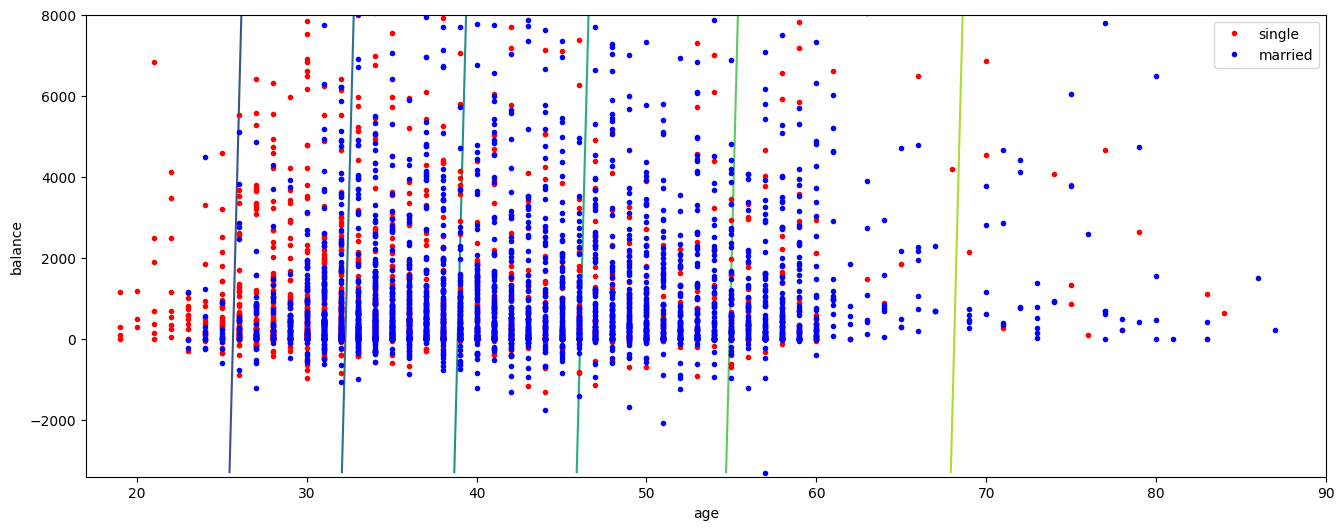

In [12]:
plt.figure(figsize=(16,6))
plt.plot(x2[y2==0,0],x2[y2==0,1],'r.',label = 'single')
plt.plot(x2[y2==1,0],x2[y2==1,1],'b.', label = 'married')

z = yp[:,1].reshape(x2_0.shape)
temp = plt.contour(x2_0,x2_1,z)
plt.clabel(temp,inline = 1)
plt.axis([17,90,-3400,8000])
plt.xlabel('age')
plt.ylabel('balance')
plt.legend()